In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm
import time


import seaborn as sns
sns.set_style("whitegrid")

from scipy.spatial.distance import jensenshannon

import urllib3
import json

# For the Python notebook
%matplotlib inline
%reload_ext autoreload
%autoreload 2

# Get data from nomis

In [2]:
df = pd.read_csv('../../data/testing/nomis/fam_comp.csv', index_col=0)

In [3]:
boroughs = ['Camden', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']

In [4]:
dct = {}

for b in boroughs:
    dct[b] = df[b].values

In [5]:
df = pd.DataFrame(dct, index=df.index)

In [6]:
df.to_csv('../../data/testing_del/nomis/fam_comp.csv')

# Compute values for synthetic data

In [7]:
boroughs = ['Camden', 'Westminster', 'Kingston upon Thames', 'Bromley', 'Greenwich', 'Havering', 'Barnet', 'Enfield', 'Hillingdon', 'Brent']
idx = ['Total', 'Single', 'Couple family', 'Lone parent', 'Other']

In [8]:
# ciDATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/ciDATGAN_del/{}.csv'.format(b))

    vals = [0]

    for c in idx[1:]:
        vals.append(np.sum(1/df[df['hh_comp'] == c]['hh_people']))

    vals[0] = np.sum(vals[1:])

    dct[b] = vals

In [9]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/ciDATGAN/fam_comp.csv')

In [10]:
# DATGAN
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/DATGAN_del/{}.csv'.format(b))

    vals = [0]

    for c in idx[1:]:
        vals.append(np.sum(1/df[df['hh_comp'] == c]['hh_people']))

    vals[0] = np.sum(vals[1:])

    dct[b] = vals

In [11]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/DATGAN/fam_comp.csv')

In [12]:
# oversample
dct = {}

for b in boroughs:
    df = pd.read_csv('../../data/oversample_del/{}.csv'.format(b))

    vals = [0]

    for c in idx[1:]:
        vals.append(np.sum(1/df[df['hh_comp'] == c]['hh_people']))

    vals[0] = np.sum(vals[1:])

    dct[b] = vals

In [13]:
df = pd.DataFrame(dct, index=idx)
df.to_csv('../../data/testing_del/oversample/fam_comp.csv')

# Compare

In [19]:
orig = pd.read_csv('../../data/testing_del/nomis/fam_comp.csv', index_col=0)

In [20]:
files = [
    '../../data/testing_del/DATGAN/fam_comp.csv',
    '../../data/testing_del/ciDATGAN/fam_comp.csv',
    '../../data/testing_del/oversample/fam_comp.csv'
]

dfs = [pd.read_csv(f, index_col=0) for f in files]
labels = ['DATGAN', 'ciDATGAN', 'Oversample LTDS']

In [21]:
orig = orig/orig.iloc[0]
orig = orig.iloc[1:-1]

errors = {}

for (df, l) in zip(dfs, labels):
    df = df/df.iloc[0]
    df = df.iloc[1:-1]

    errors[l] = []

    for c in orig.columns:
        errors[l].append(jensenshannon(df[c], orig[c]))

In [22]:
for l in labels:
    print('{}: {:.2e} \pm {:.2e}'.format(l, np.mean(errors[l]), np.std(errors[l])))

DATGAN: 1.24e-01 \pm 7.62e-02
ciDATGAN: 8.15e-02 \pm 4.10e-02
Oversample LTDS: 1.22e-01 \pm 5.40e-02


<AxesSubplot:>

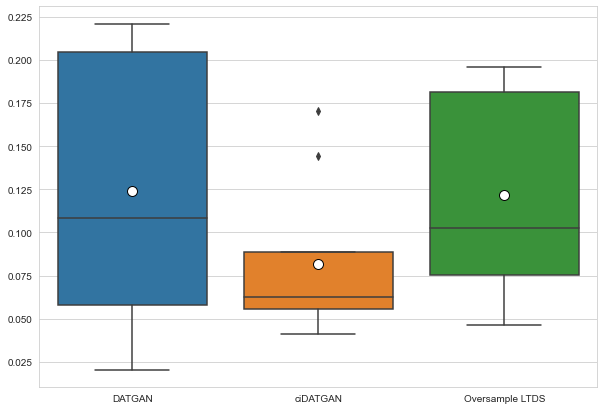

In [23]:
df = pd.DataFrame(errors)

plt.figure(figsize=(10,7))

sns.boxplot(data=df,showmeans=True,
            meanprops={"marker":"o",
                       "markerfacecolor":"white",
                       "markeredgecolor":"black",
                      "markersize":"10"})

In [24]:
df

,DATGAN,ciDATGAN,Oversample LTDS
0,0.221102,0.144214,0.104627
1,0.094450,0.170194,0.195766
2,0.122186,0.065750,0.100531
3,0.201426,0.055730,0.063838
4,0.028002,0.087196,0.183597
5,0.082457,0.055715,0.068451
6,0.205444,0.040966,0.096516
7,0.049847,0.058782,0.174457
8,0.020485,0.047401,0.183563
9,0.213188,0.088875,0.046551
